<a href="https://colab.research.google.com/github/jieun0441/DataScience/blob/master/Another_copy_of_SP_simulation_ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### data load & Setting

In [1]:
# For Colab Use
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Package loading
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [3]:
# data load for regression
data = pd.read_excel('/content/drive/MyDrive/SP/D_dong_Dataset_netcard영향14개구는 구별 가정으로포함.xlsx', sheet_name = "dong_wk20_35")

In [4]:
# data to calculate X vars
# SWMxinf_S
SWMxinf_S = pd.read_excel('/content/drive/MyDrive/SP/SWMxinf_from_Seoul.xlsx') # 유동인구 from Seoul to Seoul
# SWMxinf_NS
SWMxinf_NS = pd.read_excel('/content/drive/MyDrive/SP/SWMxinf_from_nonSeoul.xlsx') # 유동인구 from 비서울 to Seoul

# Card
Card_S = pd.read_excel('/content/drive/MyDrive/SP/netCard_from_Seoul.xlsx') # Card from Seoul to Seoul
Card_NS = pd.read_excel('/content/drive/MyDrive/SP/netCard_from_nonSeoul.xlsx') # Card from 비서울 to Seoul

In [ ]:
Card_S = pd.read_excel('/content/drive/MyDrive/SP/netCard_from_Seoul.xlsx') # Card from Seoul to Seoul

In [5]:
# population
population = pd.read_excel('/content/drive/MyDrive/SP/population_by_gu_dong.xlsx')

### OLS Regression with prepared data

In [6]:
# Adjust the decimal points of the X variables
data['signetCardxinf_m1wk_same_de4'] = data['signetCard_samexorig_inf_m1wk'] / 10000
data['sigSWM_m1wkxinf_m1wk_de6'] = data['sigSWM_m1wkxinf_m1wk'] / 1000000
data['signetCardxinf_m1wk_diff_de4'] = data['signetCard_diffxorig_infm1wk_fromKorea'] / 10000
data['Exposu_netCardxdestinf_wkm1_de3'] = data['Exposure_sum_netCardxdest_inf'] / 1000

# Define the list of gu values to filter
gu_values = ["강북구", "관악구", "노원구", "동대문구", "동작구", "양천구", "영등포구", "용산구", "은평구", "종로구", "중랑구"]

# Filter the data to include only rows where 'gu' is in gu_values
filtered_data = data[data['gu'].isin(gu_values)]

# Define the explanatory variables (X) and the dependent variable (y) using the filtered dataset
X = filtered_data[['Infm2wk_orig_assumption',
                   'sigSWM_m1wkxinf_m1wk_de6',
                   'signetCardxinf_m1wk_same_de4',
                   'signetCardxinf_m1wk_diff_de4',
                   'Exposu_netCardxdestinf_wkm1_de3']]
y = filtered_data['Inf_orig_assumption']

In [ ]:
# # Define the explanatory variables (X) and the dependent variable (y) using the whole dataset
# X = data[['Infm2wk_orig_assumption',
#           'sigSWM_m1wkxinf_m1wk',
#           'signetCard_samexorig_inf_m1wk',
#           'signetCard_diffxorig_infm1wk_fromKorea',
#           'Exposure_sum_netCardxdest_inf']]
# y = data['Inf_orig_assumption']

In [7]:
# Run the OLS regression model without intercept
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Inf_orig_assumption   R-squared (uncentered):                   0.267
Model:                             OLS   Adj. R-squared (uncentered):              0.265
Method:                  Least Squares   F-statistic:                              212.5
Date:                 Fri, 11 Oct 2024   Prob (F-statistic):                   8.78e-194
Time:                         14:54:25   Log-Likelihood:                         -8487.9
No. Observations:                 2928   AIC:                                  1.699e+04
Df Residuals:                     2923   BIC:                                  1.702e+04
Df Model:                            5                                                  
Covariance Type:             nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------

# With only Seoul

## Simulation 1-1 - with Geographic Restrictions

In [8]:
#@title Creating Simulation Result Table
weeks = range(20, 36)
dongs = data['dong'].unique() # 424개 동, 11개구 내 속한 동으로만 하려면 dongs = filtered_data['dong'].unique()로 해야함
predictions_df = pd.DataFrame(index=dongs, columns=[f"week_{week}" for week in weeks])

In [ ]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 송파구가락1동 to 동작구흑석동
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   week_20     0 non-null      object
 1   week_21     0 non-null      object
 2   week_22     0 non-null      object
 3   week_23     0 non-null      object
 4   week_24     0 non-null      object
 5   week_25     0 non-null      object
 6   week_26     0 non-null      object
 7   week_27     0 non-null      object
 8   week_28     0 non-null      object
 9   week_29     0 non-null      object
 10  week_30     0 non-null      object
 11  week_31     0 non-null      object
 12  week_32     0 non-null      object
 13  week_33     0 non-null      object
 14  week_34     0 non-null      object
 15  week_35     0 non-null      object
 16  gu          424 non-null    object
 17  population  424 non-null    int64 
dtypes: int64(1), object(17)
memory usage: 79.1+ KB


In [ ]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gu          424 non-null    object
 1   dong        424 non-null    object
 2   population  424 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 10.1+ KB


In [9]:
# Set 'dong' column as the index for population DataFrame
population.set_index('dong', inplace = True)

# Join the DataFrames
merged_df = predictions_df.join(population, how = 'inner')
predictions_df = merged_df
predictions_df.head(3)

,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,gu,population
송파구가락1동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,27876
송파구가락2동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,33204
송파구가락본동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,27368


In [ ]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 송파구가락1동 to 동작구흑석동
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   week_20     0 non-null      object
 1   week_21     0 non-null      object
 2   week_22     0 non-null      object
 3   week_23     0 non-null      object
 4   week_24     0 non-null      object
 5   week_25     0 non-null      object
 6   week_26     0 non-null      object
 7   week_27     0 non-null      object
 8   week_28     0 non-null      object
 9   week_29     0 non-null      object
 10  week_30     0 non-null      object
 11  week_31     0 non-null      object
 12  week_32     0 non-null      object
 13  week_33     0 non-null      object
 14  week_34     0 non-null      object
 15  week_35     0 non-null      object
 16  gu          424 non-null    object
 17  population  424 non-null    int64 
dtypes: int64(1), object(17)
memory usage: 79.1+ KB


In [10]:
# Function to fetch m2wk infection rates from 'data'
def get_m2wk_infection_rate(data, week, dong):
    # Generate the id for the target week
    target_id = f"{week}{dong}"

    # Filter the row with the corresponding id
    row = data[data['id'] == target_id]

    # Return the infection rate (Infm2wk_orig_assumption) if the row exists
    if not row.empty:
        return row['Infm2wk_orig_assumption'].values[0]
    else:
        return np.nan  # or any default value you prefer

In [12]:
#@title Iterate over each week to predict infection rates
for week in range(20, 36): # weeks = range(20, 36)
    # Create a DataFrame for the current week's prediction input
    df_input = pd.DataFrame(index=dongs) # 424개 동을 index로 갖는 데이터프레임 만듦
    df_input['week_dest'] = [f"{week}{dong}" for dong in df_input.index]
    df_input['m1wk_dest'] = [f"{week - 1}{dong}" for dong in df_input.index]

    # Calculate explanatory variables for the current week
    # 1) 2주 전 해당 지역의 감염률 관련변수: Add 'Infm2wk_orig_assumption'
    if week in [20, 21]:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: get_m2wk_infection_rate(data, week, dong))
    else:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: predictions_df.at[dong, f'week_{week - 2}'])

    # 2) 유동인구패턴 관련변수: Add sigSWM_m1wkxinf_m1wk_de6
        # (aggreated_df에서 'sigSWM_m1wkxinf_m1wk_de6'값 각각을 df_input의 week_dest가 일치하는 행에 찾아넣기)
    if week == 20: # 19주차에 해당하는 변수를 가져와야함
       # Group by the 'week_dest' column and sum the 'avg_SWMxinforig' values
       aggregated_SWM = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()
    else: # if week >= 21
       # 구별 infections rate 계산: 동별 predicted values의 population 가중 평균
       # Merge predictions_df with population_data to get the population and gu
       merged_pop_inf = pd.merge(population, predictions_df[[f'week_{week - 1}']], left_on='dong', right_index=True)

       # Calculate total infections for each dong
       merged_pop_inf['infectionsxpopulation'] = merged_pop_inf[f'week_{week -1}'] * merged_pop_inf['population']

       # Aggregate total infections and population by gu
       gu_infections = merged_pop_inf.groupby('gu')['infectionsxpopulation'].sum().reset_index()
       gu_population = merged_pop_inf.groupby('gu')['population'].sum().reset_index()

       # Merge the total infections and population dataframes
       gu_merged = pd.merge(gu_infections, gu_population, on='gu')

       # Calculate the infection rate for each gu
       gu_merged['infection_rate'] = gu_merged['infectionsxpopulation'] / gu_merged['population']

       # Filter rows in SWMxinf_S where the week column matches the previous week value
       filtered_SWMxinf_S = SWMxinf_S[SWMxinf_S['week'] == (week - 1)]

       # Merge the filtered DataFrame with gu_merged based on 'orig_gu' and 'gu'
       merged_df = pd.merge(filtered_SWMxinf_S, gu_merged, left_on='orig_gu', right_on='gu', how='left')

       # Update the inforig column in the original SWMxinf_S DataFrame
       SWMxinf_S.loc[SWMxinf_S['week'] == (week-1), 'inforig'] = merged_df['infection_rate'].values

       # SWMxinf_S의 avg_SWMxinforig 계산(현재 week 해당분만)
       mask = SWMxinf_S['week'] == (week-1)
       SWMxinf_S.loc[mask, 'avg_SWMxinforig'] = SWMxinf_S.loc[mask, 'avg_flow_10to17'] * SWMxinf_S.loc[mask, 'inforig']

       # Group by the 'week_dest' and calculate sum the 'avg_SWMxinforig' values
       aggregated_SWM = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum, if desired
    aggregated_SWM.rename(columns={'avg_SWMxinforig': 'sum_avg_SWMxinforig'}, inplace=True)

    aggregated_SWM['sigSWM_m1wkxinf_m1wk_de6'] = aggregated_SWM['sum_avg_SWMxinforig'] / 1000000

    df_input = pd.merge(df_input, aggregated_SWM[['week_dest','sigSWM_m1wkxinf_m1wk_de6']], how = 'left', left_on = 'm1wk_dest', right_on = 'week_dest')

   # 3) 같은 OD간 카드사용 변화 관련 변수: 'signetCardxinf_m1wk_same_de4'
    if week == 20: # 20주차 estimate 위한 변수로는 19주차에 해당하는 변수를 가져옴
       # sameOD_mask
       mask_sameOD = Card_S['orig_dong_name'] == Card_S['dest_dong_name']

       # sameOD netCardxorig_inf 계산
       Card_S.loc[mask_sameOD, 'netCardxorig_inf'] = Card_S.loc[mask_sameOD, 'netCard'] * Card_S.loc[mask_sameOD, 'orig_inf']

       # Group by the 'id_week_dest_dong' and calculate sum the 'netCard_samexinforig' values
       aggregated_Card_S_sameOD = Card_S[mask_sameOD].groupby('id_week_dest_dong')['netCardxorig_inf'].sum().reset_index()

    else: # this part not yet coded
       # Filter rows in netCardxinf where the week column matches the previous week value
       filtered_Card_S = Card_S[(Card_S['week'] == (week - 1))]
       # predictions_df에서 해당 주차의 감염률 데이터를 가져옴
       m1wk_column = f'week_{week - 1}'

       # Update the Card_S['orig_inf'] from the predictions_df dataframe's week_{week - 1} column
       # (orig_dong_name과 predictions_df의 index(동 이름)가 일치하는 행을 찾아 orig_inf 값을 업데이트)
       filtered_Card_S.loc[:, 'orig_inf'] = filtered_Card_S.apply(lambda row: predictions_df.loc[row['orig_dong_name'], m1wk_column]
                    if row['orig_dong_name'] in predictions_df.index else row['orig_inf'], axis=1)

       # Update netCardxorig_inf
       filtered_Card_S.loc[:, 'netCardxorig_inf'] = filtered_Card_S['netCard'] * filtered_Card_S['orig_inf']

       # sameOD_mask
       mask_sameOD_in_filtered = filtered_Card_S['orig_dong_name'] == filtered_Card_S['dest_dong_name']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_sameOD = filtered_Card_S[mask_sameOD_in_filtered].groupby('id_week_dest_dong')['netCardxorig_inf'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_S_sameOD.rename(columns={'netCardxorig_inf': 'signetCardxinf_same'}, inplace=True)
    # Create a decimal point adjusted-variable
    aggregated_Card_S_sameOD['signetCardxinf_same_de4'] = aggregated_Card_S_sameOD['signetCardxinf_same'] / 10000

    # merge signetCardxinf_same_de4 based on destination dong
    df_input = pd.merge(df_input, aggregated_Card_S_sameOD[['id_week_dest_dong', 'signetCardxinf_same_de4']],
                  left_on='m1wk_dest', right_on='id_week_dest_dong', how='left')
    df_input['signetCardxinf_m1wk_same_de4'] = df_input['signetCardxinf_same_de4']
    df_input = df_input.drop(['id_week_dest_dong', 'signetCardxinf_same_de4'], axis=1)


   # 4) 다른 OD간 카드사용 변화 관련 변수1 (들어오는): 'signetCardxinf_m1wk_diff_de4'
    if week == 20:
      # diffOD_mask
       mask_diffOD = Card_S['orig_dong_name'] != Card_S['dest_dong_name']

      # diffOD netCardxorig_inf 계산
       Card_S.loc[mask_diffOD, 'netCardxorig_inf'] = Card_S.loc[mask_diffOD, 'netCard'] * Card_S.loc[mask_diffOD, 'orig_inf']

      # Group by the 'id_week_dest_dong' and calculate sum the 'netCard_diffxinforig' values
       aggregated_Card_S_diffOD = Card_S[mask_diffOD].groupby('id_week_dest_dong')['netCardxorig_inf'].sum().reset_index()

    else: # if week >= 21
       # diffOD_mask
       mask_diffOD_in_filtered = filtered_Card_S['orig_dong_name'] != filtered_Card_S['dest_dong_name']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_diffOD = filtered_Card_S[mask_diffOD_in_filtered].groupby('id_week_dest_dong')['netCardxorig_inf'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_S_diffOD.rename(columns={'netCardxorig_inf': 'signetCardxinf_diff'}, inplace=True)

    # Create a decimal point adjusted-variable
    aggregated_Card_S_diffOD['signetCardxinf_diff_de4'] = aggregated_Card_S_diffOD['signetCardxinf_diff'] / 10000

    # want to add 'signetCardxinf_m1wk_diff_de4' column in df_input dataframe according to m1wk_dest
    df_input = pd.merge(df_input, aggregated_Card_S_diffOD[['id_week_dest_dong', 'signetCardxinf_diff_de4']],
                  left_on='m1wk_dest', right_on='id_week_dest_dong', how='left')
    df_input['signetCardxinf_m1wk_diff_de4'] = df_input['signetCardxinf_diff_de4']
    df_input = df_input.drop(['id_week_dest_dong', 'signetCardxinf_diff_de4'], axis=1)


   # 5) 다른 OD간 카드사용 변화 관련 변수2 (나가는): 'Exposu_netCardxdestinf_wkm1_de3'
    if week == 20:
      # diffOD netCardxdest_inf 계산
      Card_S.loc[mask_diffOD, 'netCardxdest_inf'] = Card_S.loc[mask_diffOD, 'netCard'] * Card_S.loc[mask_diffOD, 'dest_inf']

      # Group by the 'id_week_orig_dong' and calculate sum of the 'netCard_diffxinfdest' values
      aggregated_Card_S_exposure = Card_S[mask_diffOD].groupby('id_week_orig_dong')['netCardxdest_inf'].sum().reset_index()
    else:
       # Update the Card_S['dest_inf'] from the predictions_df dataframe's week_{week - 1} column
       filtered_Card_S.loc[:, 'dest_inf'] = filtered_Card_S.apply(lambda row: predictions_df.loc[row['dest_dong_name'], m1wk_column]
                    if row['dest_dong_name'] in predictions_df.index else row['dest_inf'], axis=1)

       # Update netCardxdest_inf
       filtered_Card_S.loc[:, 'netCardxdest_inf'] = filtered_Card_S['netCard'] * filtered_Card_S['dest_inf']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_sameOD = filtered_Card_S[mask_diffOD_in_filtered].groupby('id_week_orig_dong')['netCardxdest_inf'].sum().reset_index()

    aggregated_Card_S_exposure.rename(columns = {'netCardxdest_inf': 'signetCardxdest_inf'}, inplace = True)
    aggregated_Card_S_exposure['signetCardxdest_inf_de3'] = aggregated_Card_S_exposure['signetCardxdest_inf']/1000

    df_input = pd.merge(df_input, aggregated_Card_S_exposure[['id_week_orig_dong', 'signetCardxdest_inf_de3']],
                  left_on = 'm1wk_dest', right_on = 'id_week_orig_dong', how = 'left')
    df_input['Exposu_netCardxdestinf_wkm1_de3'] = df_input['signetCardxdest_inf_de3']
    df_input = df_input.drop(['id_week_orig_dong', 'signetCardxdest_inf_de3'], axis = 1)

    # Save the current week's prediction input DataFrame to an Excel file
    df_input['dong_name'] = df_input.index
    df_input.to_excel(f'/content/drive/MyDrive/SP/input tables/df_input_ver3_week{week}.xlsx')

    # Predict the infection rates for the current week using the model
    X_input = df_input[['Infm2wk_orig_assumption',
                                  'sigSWM_m1wkxinf_m1wk_de6',
                                  'signetCardxinf_m1wk_same_de4',
                                  'signetCardxinf_m1wk_diff_de4',
                                  'Exposu_netCardxdestinf_wkm1_de3']]

    # Use the model to predict the infection rate
    y_pred = model.predict(X_input)

    # Replace negative values in y_pred with 0
    y_pred = np.where(y_pred < 0, 0, y_pred)

    # Update the predictions DataFrame with the predicted values
    predictions_df[f'week_{week}'] = y_pred


In [13]:
# Print the final predictions DataFrame
predictions_df.to_excel('/content/drive/MyDrive/SP/simulation results/predictions_with_Geographic Restrictions_ver3.xlsx', index=True)

# Create an empty dictionary to store aggregated results
results = {}

# Iterate through each week column
for week in range(20, 36):
    week_column = f'week_{week}'
    if week_column in predictions_df.columns:
        # Calculate population * week_X for each dong and sum up the values
        results[week_column] = (predictions_df['population'] * predictions_df[week_column]).sum()/100000

# Convert the results dictionary to a DataFrame
results_df_withR = pd.DataFrame(list(results.items()), columns=['Week', 'Sum of New Cases withR'])
results_df_withR

,Week,Sum of New Cases withR
0,week_20,85.244967
1,week_21,54.812195
2,week_22,40.207965
3,week_23,30.382191
4,week_24,21.893310
5,week_25,16.142474
6,week_26,11.910985
7,week_27,8.085009
8,week_28,5.875366
9,week_29,4.050950


## Simulation 1-2 - without Geographic Restrictions

In [14]:
#@title Creating Simulation Result Table
weeks = range(20, 36)
dongs = data['dong'].unique() # 424개 동, 11개구 내 속한 동으로만 하려면 dongs = filtered_data['dong'].unique()로 해야함
predictions_df_wo = pd.DataFrame(index=dongs, columns=[f"week_{week}" for week in weeks])

# Join the DataFrames
merged_df = predictions_df_wo.join(population, how = 'inner')
predictions_df_wo = merged_df
predictions_df_wo.head(3)

,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,gu,population
송파구가락1동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,27876
송파구가락2동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,33204
송파구가락본동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,27368


In [15]:
#@title Iterate over each week to predict infection rates w/o geographic restrictions
for week in range(20, 36): # weeks = range(20, 36)
    # Create a DataFrame for the current week's prediction input
    df_input = pd.DataFrame(index=dongs) # 424개 동을 index로 갖는 데이터프레임 만듦
    df_input['week_dest'] = [f"{week}{dong}" for dong in df_input.index]
    df_input['m1wk_dest'] = [f"{week - 1}{dong}" for dong in df_input.index]

    # Calculate explanatory variables for the current week
    # 1) 2주 전 해당 지역의 감염률 관련변수: Add 'Infm2wk_orig_assumption'
    if week in [20, 21]:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: get_m2wk_infection_rate(data, week, dong))
    else:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: predictions_df_wo.at[dong, f'week_{week - 2}'])

    # 2) 유동인구패턴 관련변수: Add sigSWM_m1wkxinf_m1wk_de6
        # (aggreated_df에서 'sigSWM_m1wkxinf_m1wk_de6'값 각각을 df_input의 week_dest가 일치하는 행에 찾아넣기)
    if week == 20: # 19주차에 해당하는 변수를 가져와야함
       # Group by the 'week_dest' column and sum the 'avg_SWMxinforig' values
       aggregated_SWM = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()
    else: # if week >= 21
       # 구별 infections rate 계산: 동별 predicted values의 population 가중 평균
       # Merge predictions_df_wo with population_data to get the population and gu
       merged_pop_inf = pd.merge(population, predictions_df_wo[[f'week_{week - 1}']], left_on='dong', right_index=True)

       # Calculate total infections for each dong
       merged_pop_inf['infectionsxpopulation'] = merged_pop_inf[f'week_{week -1}'] * merged_pop_inf['population']

       # Aggregate total infections and population by gu
       gu_infections = merged_pop_inf.groupby('gu')['infectionsxpopulation'].sum().reset_index()
       gu_population = merged_pop_inf.groupby('gu')['population'].sum().reset_index()

       # Merge the total infections and population dataframes
       gu_merged = pd.merge(gu_infections, gu_population, on='gu')

       # Calculate the infection rate for each gu
       gu_merged['infection_rate'] = gu_merged['infectionsxpopulation'] / gu_merged['population']

       # Filter rows in SWMxinf_S where the week column matches the previous week value
       filtered_SWMxinf_S = SWMxinf_S[SWMxinf_S['week'] == (week - 1)]

       # Merge the filtered DataFrame with gu_merged based on 'orig_gu' and 'gu'
       merged_df = pd.merge(filtered_SWMxinf_S, gu_merged, left_on='orig_gu', right_on='gu', how='left')

       # Update the inforig column in the original SWMxinf_S DataFrame
       SWMxinf_S.loc[SWMxinf_S['week'] == (week-1), 'inforig'] = merged_df['infection_rate'].values

       # SWMxinf_S의 avg_SWMxinforig 계산(현재 week 해당분만)
       mask = SWMxinf_S['week'] == (week-1)
       SWMxinf_S.loc[mask, 'avg_SWMxinforig'] = SWMxinf_S.loc[mask, 'avg_flow_10to17'] * SWMxinf_S.loc[mask, 'inforig']

       # Group by the 'week_dest' and calculate sum the 'avg_SWMxinforig' values
       aggregated_SWM = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum, if desired
    aggregated_SWM.rename(columns={'avg_SWMxinforig': 'sum_avg_SWMxinforig'}, inplace=True)

    aggregated_SWM['sigSWM_m1wkxinf_m1wk_de6'] = aggregated_SWM['sum_avg_SWMxinforig'] / 1000000

    df_input = pd.merge(df_input, aggregated_SWM[['week_dest','sigSWM_m1wkxinf_m1wk_de6']], how = 'left', left_on = 'm1wk_dest', right_on = 'week_dest')

   # 3) 같은 OD간 카드사용 변화 관련 변수: 'signetCardxinf_m1wk_same_de4'
    if week == 20: # 20주차 estimate 위한 변수로는 19주차에 해당하는 변수를 가져옴
       # sameOD_mask
       mask_sameOD = Card_S['orig_dong_name'] == Card_S['dest_dong_name']

       # sameOD netCardxorig_inf 계산
       Card_S.loc[mask_sameOD, 'netCard_woRxorig_inf'] = Card_S.loc[mask_sameOD, 'netCard_woR3'] * Card_S.loc[mask_sameOD, 'orig_inf']

       # Group by the 'id_week_dest_dong' and calculate sum the 'netCard_samexinforig' values
       aggregated_Card_S_sameOD = Card_S[mask_sameOD].groupby('id_week_dest_dong')['netCard_woRxorig_inf'].sum().reset_index()

    else: # this part not yet coded
       # Filter rows in netCardxinf where the week column matches the previous week value
       filtered_Card_S = Card_S[(Card_S['week'] == (week - 1))]
       # predictions_df_wo에서 해당 주차의 감염률 데이터를 가져옴
       m1wk_column = f'week_{week - 1}'

       # Update the Card_S['orig_inf'] from the predictions_df_wo dataframe's week_{week - 1} column
       # (orig_dong_name과 predictions_df_wo의 index(동 이름)가 일치하는 행을 찾아 orig_inf 값을 업데이트)
       filtered_Card_S.loc[:, 'orig_inf'] = filtered_Card_S.apply(lambda row: predictions_df_wo.loc[row['orig_dong_name'], m1wk_column]
                    if row['orig_dong_name'] in predictions_df_wo.index else row['orig_inf'], axis=1)

       # Update netCardxorig_inf
       filtered_Card_S.loc[:, 'netCard_woRxorig_inf'] = filtered_Card_S['netCard_woR3'] * filtered_Card_S['orig_inf']

       # sameOD_mask
       mask_sameOD_in_filtered = filtered_Card_S['orig_dong_name'] == filtered_Card_S['dest_dong_name']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_sameOD = filtered_Card_S[mask_sameOD_in_filtered].groupby('id_week_dest_dong')['netCard_woRxorig_inf'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_S_sameOD.rename(columns={'netCard_woRxorig_inf': 'signetCardxinf_same'}, inplace=True)
    # Create a decimal point adjusted-variable
    aggregated_Card_S_sameOD['signetCardxinf_same_de4'] = aggregated_Card_S_sameOD['signetCardxinf_same'] / 10000

    # merge signetCardxinf_same_de4 based on destination dong
    df_input = pd.merge(df_input, aggregated_Card_S_sameOD[['id_week_dest_dong', 'signetCardxinf_same_de4']],
                  left_on='m1wk_dest', right_on='id_week_dest_dong', how='left')
    df_input['signetCardxinf_m1wk_same_de4'] = df_input['signetCardxinf_same_de4']
    df_input = df_input.drop(['id_week_dest_dong', 'signetCardxinf_same_de4'], axis=1)


   # 4) 다른 OD간 카드사용 변화 관련 변수1 (들어오는): 'signetCardxinf_m1wk_diff_de4'
    if week == 20:
      # diffOD_mask
       mask_diffOD = Card_S['orig_dong_name'] != Card_S['dest_dong_name']

      # diffOD netCardxorig_inf 계산
       Card_S.loc[mask_diffOD, 'netCard_woRxorig_inf'] = Card_S.loc[mask_diffOD, 'netCard_woR3'] * Card_S.loc[mask_diffOD, 'orig_inf']

      # Group by the 'id_week_dest_dong' and calculate sum the 'netCard_woR_diffxinforig' values
       aggregated_Card_S_diffOD = Card_S[mask_diffOD].groupby('id_week_dest_dong')['netCard_woRxorig_inf'].sum().reset_index()

    else: # if week >= 21
       # diffOD_mask
       mask_diffOD_in_filtered = filtered_Card_S['orig_dong_name'] != filtered_Card_S['dest_dong_name']

       # aggregate netCard_woRxorig_inf by destination dong
       aggregated_Card_S_diffOD = filtered_Card_S[mask_diffOD_in_filtered].groupby('id_week_dest_dong')['netCard_woRxorig_inf'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_S_diffOD.rename(columns={'netCard_woRxorig_inf': 'signetCardxinf_diff'}, inplace=True)

    # Create a decimal point adjusted-variable
    aggregated_Card_S_diffOD['signetCardxinf_diff_de4'] = aggregated_Card_S_diffOD['signetCardxinf_diff'] / 10000

    # want to add 'signetCardxinf_m1wk_diff_de4' column in df_input dataframe according to m1wk_dest
    df_input = pd.merge(df_input, aggregated_Card_S_diffOD[['id_week_dest_dong', 'signetCardxinf_diff_de4']],
                  left_on='m1wk_dest', right_on='id_week_dest_dong', how='left')
    df_input['signetCardxinf_m1wk_diff_de4'] = df_input['signetCardxinf_diff_de4']
    df_input = df_input.drop(['id_week_dest_dong', 'signetCardxinf_diff_de4'], axis=1)


   # 5) 다른 OD간 카드사용 변화 관련 변수2 (나가는): 'Exposu_netCardxdestinf_wkm1_de3'
    if week == 20:
      # diffOD netCardxdest_inf 계산
      Card_S.loc[mask_diffOD, 'netCard_woRxdest_inf'] = Card_S.loc[mask_diffOD, 'netCard_woR3'] * Card_S.loc[mask_diffOD, 'dest_inf']

      # Group by the 'id_week_orig_dong' and calculate sum of the 'netCard_woR_diffxinfdest' values
      aggregated_Card_S_exposure = Card_S[mask_diffOD].groupby('id_week_orig_dong')['netCard_woRxdest_inf'].sum().reset_index()
    else:
       # Update the Card_S['dest_inf'] from the predictions_df_wo dataframe's week_{week - 1} column
       filtered_Card_S.loc[:, 'dest_inf'] = filtered_Card_S.apply(lambda row: predictions_df_wo.loc[row['dest_dong_name'], m1wk_column]
                    if row['dest_dong_name'] in predictions_df_wo.index else row['dest_inf'], axis=1)

       # Update netCard_woRxdest_inf
       filtered_Card_S.loc[:, 'netCard_woRxdest_inf'] = filtered_Card_S['netCard_woR3'] * filtered_Card_S['dest_inf']

       # aggregate netCard_woRxorig_inf by destination dong
       aggregated_Card_S_sameOD = filtered_Card_S[mask_diffOD_in_filtered].groupby('id_week_orig_dong')['netCard_woRxdest_inf'].sum().reset_index()

    aggregated_Card_S_exposure.rename(columns = {'netCard_woRxdest_inf': 'signetCardxdest_inf'}, inplace = True)
    aggregated_Card_S_exposure['signetCardxdest_inf_de3'] = aggregated_Card_S_exposure['signetCardxdest_inf']/1000

    df_input = pd.merge(df_input, aggregated_Card_S_exposure[['id_week_orig_dong', 'signetCardxdest_inf_de3']],
                  left_on = 'm1wk_dest', right_on = 'id_week_orig_dong', how = 'left')
    df_input['Exposu_netCardxdestinf_wkm1_de3'] = df_input['signetCardxdest_inf_de3']
    df_input = df_input.drop(['id_week_orig_dong', 'signetCardxdest_inf_de3'], axis = 1)

    # Save the current week's prediction input DataFrame to an Excel file
    df_input['dong_name'] = df_input.index
    df_input.to_excel(f'/content/drive/MyDrive/SP/input tables_woR/df_input_ver3_woR_week{week}.xlsx')

    # Predict the infection rates for the current week using the model
    X_input = df_input[['Infm2wk_orig_assumption',
                                  'sigSWM_m1wkxinf_m1wk_de6',
                                  'signetCardxinf_m1wk_same_de4',
                                  'signetCardxinf_m1wk_diff_de4',
                                  'Exposu_netCardxdestinf_wkm1_de3']]

    # Use the model to predict the infection rate
    y_pred = model.predict(X_input)

    # Replace negative values in y_pred with 0
    y_pred = np.where(y_pred < 0, 0, y_pred)

    # Update the predictions DataFrame with the predicted values
    predictions_df_wo[f'week_{week}'] = y_pred


In [16]:
# Print the final predictions DataFrame
predictions_df_wo.to_excel('/content/drive/MyDrive/SP/simulation results/predictions_without_Geographic Restrictions_ver3.xlsx', index=True)

# Create an empty dictionary to store aggregated results
results = {}

# Iterate through each week column
for week in range(20, 36):
    week_column = f'week_{week}'
    if week_column in predictions_df_wo.columns:
        # Calculate population * week_X for each dong and sum up the values
        results[week_column] = (predictions_df_wo['population'] * predictions_df_wo[week_column]).sum()/100000

# Convert the results dictionary to a DataFrame
results_df_woR = pd.DataFrame(list(results.items()), columns=['Week', 'Sum of New Cases woR'])
results_df_woR

,Week,Sum of New Cases woR
0,week_20,85.244967
1,week_21,52.323290
2,week_22,39.697705
3,week_23,29.721439
4,week_24,20.327184
5,week_25,14.204653
6,week_26,11.020400
7,week_27,5.918862
8,week_28,4.789038
9,week_29,3.258798


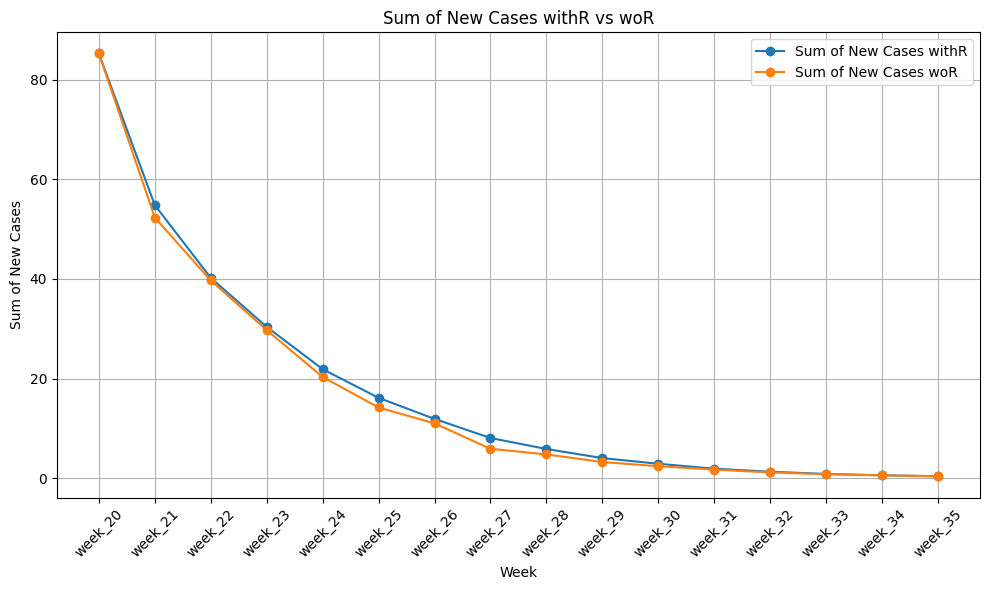

In [17]:
import matplotlib.pyplot as plt

# combining results_df
# Merge the two dataframes on the 'Week' column
merged_df = pd.merge(results_df_withR, results_df_woR, on='Week')
merged_df.to_excel('/content/drive/MyDrive/SP/simulation results/Simulation results_by_week_ver3.xlsx', index=True)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Week'], merged_df['Sum of New Cases withR'], marker='o', linestyle='-', label='Sum of New Cases withR')
plt.plot(merged_df['Week'], merged_df['Sum of New Cases woR'], marker='o', linestyle='-', label='Sum of New Cases woR')

plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases withR vs woR')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Including non-Seoul

## Simulation 2-1 - with Geographic Restrictions

In [ ]:
#@title Creating Simulation Result Table
weeks = range(20, 36)
dongs = data['dong'].unique() # 424개 동, 11개구 내 속한 동으로만 하려면 dongs = filtered_data['dong'].unique()로 해야함
predictions_df2_1 = pd.DataFrame(index=dongs, columns=[f"week_{week}" for week in weeks])

In [ ]:
predictions_df2_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 송파구가락1동 to 동작구흑석동
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   week_20  0 non-null      object
 1   week_21  0 non-null      object
 2   week_22  0 non-null      object
 3   week_23  0 non-null      object
 4   week_24  0 non-null      object
 5   week_25  0 non-null      object
 6   week_26  0 non-null      object
 7   week_27  0 non-null      object
 8   week_28  0 non-null      object
 9   week_29  0 non-null      object
 10  week_30  0 non-null      object
 11  week_31  0 non-null      object
 12  week_32  0 non-null      object
 13  week_33  0 non-null      object
 14  week_34  0 non-null      object
 15  week_35  0 non-null      object
dtypes: object(16)
memory usage: 56.3+ KB


In [ ]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gu          424 non-null    object
 1   dong        424 non-null    object
 2   population  424 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 10.1+ KB


In [ ]:
# Set 'dong' column as the index for population DataFrame
# population.set_index('dong', inplace = True)

# Join the DataFrames
merged_df = predictions_df2_1.join(population, how = 'inner')
predictions_df2_1 = merged_df
predictions_df2_1.head(3)

,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,gu,population
송파구가락1동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,27876
송파구가락2동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,33204
송파구가락본동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,27368


In [ ]:
predictions_df2_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 송파구가락1동 to 동작구흑석동
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   week_20     0 non-null      object
 1   week_21     0 non-null      object
 2   week_22     0 non-null      object
 3   week_23     0 non-null      object
 4   week_24     0 non-null      object
 5   week_25     0 non-null      object
 6   week_26     0 non-null      object
 7   week_27     0 non-null      object
 8   week_28     0 non-null      object
 9   week_29     0 non-null      object
 10  week_30     0 non-null      object
 11  week_31     0 non-null      object
 12  week_32     0 non-null      object
 13  week_33     0 non-null      object
 14  week_34     0 non-null      object
 15  week_35     0 non-null      object
 16  gu          424 non-null    object
 17  population  424 non-null    int64 
dtypes: int64(1), object(17)
memory usage: 79.1+ KB


In [ ]:
SWMxinf_NS.head()

,week,week_orig,orig_gu,week_dest,avg_flow_10to17,average_inf_orig10_17week,avg_SWMxinforig,dest
0,20,20부산광역시,부산광역시,20종로구청운효자동,302.922962,0.151091,45.768873,종로구청운효자동
1,20,20부산광역시,부산광역시,20종로구사직동,843.798206,0.151091,127.490148,종로구사직동
2,20,20부산광역시,부산광역시,20종로구삼청동,323.182713,0.151091,48.829935,종로구삼청동
3,20,20부산광역시,부산광역시,20종로구부암동,229.230384,0.151091,34.634603,종로구부암동
4,20,20부산광역시,부산광역시,20종로구평창동,347.473834,0.151091,52.500100,종로구평창동


In [ ]:
#@title functions for SWM variable updates
def aggregate_swm_data(SWMxinf_S, SWMxinf_NS):
    aggregated_SWM_S = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig_S'].sum().reset_index()
    aggregated_SWM_NS = SWMxinf_NS.groupby('week_dest')['avg_SWMxinforig_NS'].sum().reset_index()
    aggregated_SWM = pd.merge(aggregated_SWM_S, aggregated_SWM_NS, on='week_dest', suffixes=('_S', '_NS'))
    aggregated_SWM['avg_SWMxinforig'] = aggregated_SWM['avg_SWMxinforig_S'] + aggregated_SWM['avg_SWMxinforig_NS']
    return aggregated_SWM

def calculate_infection_rate(population, predictions_df, week):
    merged_pop_inf = pd.merge(population, predictions_df[[f'week_{week - 1}']], left_on='dong', right_index=True)
    merged_pop_inf['infectionsxpopulation'] = merged_pop_inf[f'week_{week -1}'] * merged_pop_inf['population']
    gu_infections = merged_pop_inf.groupby('gu')['infectionsxpopulation'].sum().reset_index()
    gu_population = merged_pop_inf.groupby('gu')['population'].sum().reset_index()
    gu_merged = pd.merge(gu_infections, gu_population, on='gu')
    gu_merged['infection_rate'] = gu_merged['infectionsxpopulation'] / gu_merged['population']
    return gu_merged

def update_inforig_S(SWMxinf_S, gu_merged, week):
    mask = SWMxinf_S['week'] == (week - 1)
    filtered_SWMxinf_S = SWMxinf_S[mask]
    merged_df_S = pd.merge(filtered_SWMxinf_S, gu_merged, left_on='orig_gu', right_on='gu', how='left')
    SWMxinf_S.loc[mask, 'inforig'] = merged_df_S['infection_rate'].values
    SWMxinf_S.loc[mask, 'avg_SWMxinforig_S'] = SWMxinf_S.loc[mask, 'avg_flow_10to17'] * SWMxinf_S.loc[mask, 'inforig']

def update_avg_SWMxinforig_NS(SWMxinf_NS, week):
    mask_NS = SWMxinf_NS['week'] == (week - 1)
    SWMxinf_NS.loc[mask_NS, 'avg_SWMxinforig_NS'] = SWMxinf_NS.loc[mask_NS, 'avg_flow_10to17'] * SWMxinf_NS.loc[mask_NS, 'inforig']

def process_week(SWMxinf_S, SWMxinf_NS, population, predictions_df, week):
    if week == 20:
        return aggregate_swm_data(SWMxinf_S, SWMxinf_NS)
    else:
        gu_merged = calculate_infection_rate(population, predictions_df, week)
        update_inforig_S(SWMxinf_S, gu_merged, week)
        update_avg_SWMxinforig_NS(SWMxinf_NS, week)
        return aggregate_swm_data(SWMxinf_S, SWMxinf_NS)

- aggregate_swm_data: Aggregates and merges the SWM data for both SWMxinf_S and SWMxinf_NS.
- calculate_infection_rate: Calculates the infection rate for each 'gu'.
- update_inforig_S: Updates the 'inforig' and 'avg_SWMxinforig_S' columns for SWMxinf_S.
- update_avg_SWMxinforig_NS: Updates the 'avg_SWMxinforig_NS' column for SWMxinf_NS.
- process_week: Determines if the week is 20 or not and processes the data accordingly.

In [ ]:
#@title Iterate over each week to predict infection rates
for week in range(20, 36): # weeks = range(20, 36)
    # Create a DataFrame for the current week's prediction input
    df_input = pd.DataFrame(index=dongs) # 424개 동을 index로 갖는 데이터프레임 만듦
    df_input['week_dest'] = [f"{week}{dong}" for dong in df_input.index]
    df_input['m1wk_dest'] = [f"{week - 1}{dong}" for dong in df_input.index]

    # Calculate explanatory variables for the current week
    # 1) 2주 전 해당 지역의 감염률 관련변수: Add 'Infm2wk_orig_assumption'
    if week in [20, 21]:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: get_m2wk_infection_rate(data, week, dong))
    else:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: predictions_df2_1.at[dong, f'week_{week - 2}'])

    # 2) 유동인구패턴 관련변수: Add sigSWM_m1wkxinf_m1wk_de6
        # (aggreated_df에서 'sigSWM_m1wkxinf_m1wk_de6'값 각각을 df_input의 week_dest가 일치하는 행에 찾아넣기)
    aggregated_SWM = process_week(SWMxinf_S, SWMxinf_NS, population, predictions_df2_1, week)

   # 3) 같은 OD간 카드사용 변화 관련 변수: 'signetCardxinf_m1wk_same_de4'
    if week == 20: # 20주차 estimate 위한 변수로는 19주차에 해당하는 변수를 가져옴
       # sameOD_mask
       mask_sameOD = Card_S['orig_dong_name'] == Card_S['dest_dong_name']

       # sameOD netCardxorig_inf 계산
       Card_S.loc[mask_sameOD, 'netCardxorig_inf'] = Card_S.loc[mask_sameOD, 'netCard'] * Card_S.loc[mask_sameOD, 'orig_inf']

       # Group by the 'id_week_dest_dong' and calculate sum the 'netCard_samexinforig' values
       aggregated_Card_S_sameOD = Card_S[mask_sameOD].groupby('id_week_dest_dong')['netCardxorig_inf'].sum().reset_index()

    else: # this part not yet coded
       # Filter rows in netCardxinf where the week column matches the previous week value
       filtered_Card_S = Card_S[(Card_S['week'] == (week - 1))]
       # predictions_df2_1에서 해당 주차의 감염률 데이터를 가져옴
       m1wk_column = f'week_{week - 1}'

       # Update the Card_S['orig_inf'] from the predictions_df2_1 dataframe's week_{week - 1} column
       # (orig_dong_name과 predictions_df2_1의 index(동 이름)가 일치하는 행을 찾아 orig_inf 값을 업데이트)
       filtered_Card_S.loc[:, 'orig_inf'] = filtered_Card_S.apply(lambda row: predictions_df2_1.loc[row['orig_dong_name'], m1wk_column]
                    if row['orig_dong_name'] in predictions_df2_1.index else row['orig_inf'], axis=1)

       # Update netCardxorig_inf
       filtered_Card_S.loc[:, 'netCardxorig_inf'] = filtered_Card_S['netCard'] * filtered_Card_S['orig_inf']

       # sameOD_mask
       mask_sameOD_in_filtered = filtered_Card_S['orig_dong_name'] == filtered_Card_S['dest_dong_name']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_sameOD = filtered_Card_S[mask_sameOD_in_filtered].groupby('id_week_dest_dong')['netCardxorig_inf'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_S_sameOD.rename(columns={'netCardxorig_inf': 'signetCardxinf_same'}, inplace=True)
    # Create a decimal point adjusted-variable
    aggregated_Card_S_sameOD['signetCardxinf_same_de4'] = aggregated_Card_S_sameOD['signetCardxinf_same'] / 10000

    # merge signetCardxinf_same_de4 based on destination dong
    df_input = pd.merge(df_input, aggregated_Card_S_sameOD[['id_week_dest_dong', 'signetCardxinf_same_de4']],
                  left_on='m1wk_dest', right_on='id_week_dest_dong', how='left')
    df_input['signetCardxinf_m1wk_same_de4'] = df_input['signetCardxinf_same_de4']
    df_input = df_input.drop(['id_week_dest_dong', 'signetCardxinf_same_de4'], axis=1)


   # 4) 다른 OD간 카드사용 변화 관련 변수1 (들어오는): 'signetCardxinf_m1wk_diff_de4'
    if week == 20:
      # diffOD_mask
       mask_diffOD = Card_S['orig_dong_name'] != Card_S['dest_dong_name']

      # diffOD netCardxorig_inf 계산
       Card_S.loc[mask_diffOD, 'netCardxorig_inf'] = Card_S.loc[mask_diffOD, 'netCard'] * Card_S.loc[mask_diffOD, 'orig_inf']

      # Group by the 'id_week_dest_dong' and calculate sum the 'netCard_diffxinforig' values
       aggregated_Card_S_diffOD = Card_S[mask_diffOD].groupby('id_week_dest_dong')['netCardxorig_inf'].sum().reset_index()

    else: # if week >= 21
       # diffOD_mask
       mask_diffOD_in_filtered = filtered_Card_S['orig_dong_name'] != filtered_Card_S['dest_dong_name']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_diffOD = filtered_Card_S[mask_diffOD_in_filtered].groupby('id_week_dest_dong')['netCardxorig_inf'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_S_diffOD.rename(columns={'netCardxorig_inf': 'signetCardxinf_diff'}, inplace=True)

    # Create a decimal point adjusted-variable
    aggregated_Card_S_diffOD['signetCardxinf_diff_de4'] = aggregated_Card_S_diffOD['signetCardxinf_diff'] / 10000

    # want to add 'signetCardxinf_m1wk_diff_de4' column in df_input dataframe according to m1wk_dest
    df_input = pd.merge(df_input, aggregated_Card_S_diffOD[['id_week_dest_dong', 'signetCardxinf_diff_de4']],
                  left_on='m1wk_dest', right_on='id_week_dest_dong', how='left')
    df_input['signetCardxinf_m1wk_diff_de4'] = df_input['signetCardxinf_diff_de4']
    df_input = df_input.drop(['id_week_dest_dong', 'signetCardxinf_diff_de4'], axis=1)


   # 5) 다른 OD간 카드사용 변화 관련 변수2 (나가는): 'Exposu_netCardxdestinf_wkm1_de3'
    if week == 20:
      # diffOD netCardxdest_inf 계산
      Card_S.loc[mask_diffOD, 'netCardxdest_inf'] = Card_S.loc[mask_diffOD, 'netCard'] * Card_S.loc[mask_diffOD, 'dest_inf']

      # Group by the 'id_week_orig_dong' and calculate sum of the 'netCard_diffxinfdest' values
      aggregated_Card_S_exposure = Card_S[mask_diffOD].groupby('id_week_orig_dong')['netCardxdest_inf'].sum().reset_index()
    else:
       # Update the Card_S['dest_inf'] from the predictions_df2_1 dataframe's week_{week - 1} column
       filtered_Card_S.loc[:, 'dest_inf'] = filtered_Card_S.apply(lambda row: predictions_df2_1.loc[row['dest_dong_name'], m1wk_column]
                    if row['dest_dong_name'] in predictions_df2_1.index else row['dest_inf'], axis=1)

       # Update netCardxdest_inf
       filtered_Card_S.loc[:, 'netCardxdest_inf'] = filtered_Card_S['netCard'] * filtered_Card_S['dest_inf']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_sameOD = filtered_Card_S[mask_diffOD_in_filtered].groupby('id_week_orig_dong')['netCardxdest_inf'].sum().reset_index()

    aggregated_Card_S_exposure.rename(columns = {'netCardxdest_inf': 'signetCardxdest_inf'}, inplace = True)
    aggregated_Card_S_exposure['signetCardxdest_inf_de3'] = aggregated_Card_S_exposure['signetCardxdest_inf']/1000

    df_input = pd.merge(df_input, aggregated_Card_S_exposure[['id_week_orig_dong', 'signetCardxdest_inf_de3']],
                  left_on = 'm1wk_dest', right_on = 'id_week_orig_dong', how = 'left')
    df_input['Exposu_netCardxdestinf_wkm1_de3'] = df_input['signetCardxdest_inf_de3']
    df_input = df_input.drop(['id_week_orig_dong', 'signetCardxdest_inf_de3'], axis = 1)

    # Save the current week's prediction input DataFrame to an Excel file
    df_input['dong_name'] = df_input.index
    df_input.to_excel(f'/content/drive/MyDrive/SP/input tables/df_input_week{week}.xlsx')

    # Predict the infection rates for the current week using the model
    X_input = df_input[['Infm2wk_orig_assumption',
                                  'sigSWM_m1wkxinf_m1wk_de6',
                                  'signetCardxinf_m1wk_same_de4',
                                  'signetCardxinf_m1wk_diff_de4',
                                  'Exposu_netCardxdestinf_wkm1_de3']]

    # Use the model to predict the infection rate
    y_pred = model.predict(X_input)

    # Replace negative values in y_pred with 0
    y_pred = np.where(y_pred < 0, 0, y_pred)

    # Update the predictions DataFrame with the predicted values
    predictions_df2_1[f'week_{week}'] = y_pred


In [ ]:
# if week == 20: # 19주차에 해당하는 변수를 가져와야함
#        # Group by the 'week_dest' column and sum the 'avg_SWMxinforig' values
#        aggregated_SWM_S = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()
#        aggregated_SWM_NS = SWMxinf_NS.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()
#        # Merge the aggregated dataframes on 'week_dest'
#        aggregated_SWM = pd.merge(aggregated_SWM_S, aggregated_SWM_NS, on = 'week_dest', suffixes = ('_S', '_NS'))
#        # create sum of _S and _NS
#        aggregated_SWM.loc['avg_SWMxinforig'] = aggregated_SWM['avg_SWMxinforig_S'] + aggregated_SWM['avg_SWMxinforig_NS']

#     else: # if week >= 21
#        # 구별 infections rate 계산: 동별 predicted values의 population 가중 평균
#        # Merge predictions_df with population_data to get the population and gu
#        merged_pop_inf = pd.merge(population, predictions_df[[f'week_{week - 1}']], left_on='dong', right_index=True)

#        # Calculate total infections for each dong
#        merged_pop_inf['infectionsxpopulation'] = merged_pop_inf[f'week_{week -1}'] * merged_pop_inf['population']

#        # Aggregate total infections and population by gu
#        gu_infections = merged_pop_inf.groupby('gu')['infectionsxpopulation'].sum().reset_index()
#        gu_population = merged_pop_inf.groupby('gu')['population'].sum().reset_index()

#        # Merge the total infections and population dataframes
#        gu_merged = pd.merge(gu_infections, gu_population, on='gu')

#        # Calculate the infection rate for each gu
#        gu_merged['infection_rate'] = gu_merged['infectionsxpopulation'] / gu_merged['population']

#        mask_S = SWMxinf_S['week'] == (week-1)
#        mask_NS = SWMxinf_NS['week'] == (week-1)

#        # Filter rows in SWMxinf_S and SWMxinf_NS where the week column matches the previous week value
#        filtered_SWMxinf_S = SWMxinf_S[mask_S]
#        filtered_SWMxinf_NS = SWMxinf_NS[mask_NS]
#        # Merge the filtered DataFrame with gu_merged based on 'orig_gu' and 'gu'
#        merged_df_S = pd.merge(filtered_SWMxinf_S, gu_merged, left_on='orig_gu', right_on='gu', how='left')
#        # SWMxinf_S의 avg_SWMxinforig 계산(현재 week 해당분만)

#        # Update the inforig column in the original SWMxinf_S DataFrame
#        SWMxinf_S.loc[mask_S, 'inforig'] = merged_df_S['infection_rate'].values

#        SWMxinf_S.loc[mask_S, 'avg_SWMxinforig_S'] = SWMxinf_S.loc[mask_S, 'avg_flow_10to17'] * SWMxinf_S.loc[mask_S, 'inforig']

#        # SWMxinf_NS의 avg_SWMxinforig 계산(현재 week 해당분만)
#        SWMxinf_NS.loc[mask_NS, 'avg_SWMxinforig_NS'] = SWMxinf_NS.loc[mask_NS, 'avg_flow_10to17'] * SWMxinf_NS.loc[mask_NS, 'inforig']

#        # Group by the 'week_dest' and calculate sum the 'avg_SWMxinforig' values
#        aggregated_SWM_S = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig_S'].sum().reset_index()
#        aggregated_SWM_NS = SWMxinf_NS.groupby('week_dest')['avg_SWMxinfoirg_NS'].sum().reset_index()

#        # Merge the aggregated dataframes on 'week_dest'
#        aggregated_SWM = pd.merge(aggregated_SWM_S, aggregated_SWM_NS, on = 'week_dest', suffixes = ('_S', '_NS'))

#        # create sum of _S and _NS
#        aggregated_SWM.loc['avg_SWMxinforig'] = aggregated_SWM['avg_SWMxinforig_S'] + aggregated_SWM['avg_SWMxinforig_NS']

#     # Rename the column to reflect that it is an aggregated sum, if desired
#     aggregated_SWM.rename(columns={'avg_SWMxinforig': 'sum_avg_SWMxinforig'}, inplace=True)

#     aggregated_SWM['sigSWM_m1wkxinf_m1wk_de6'] = aggregated_SWM['sum_avg_SWMxinforig'] / 1000000

#     df_input = pd.merge(df_input, aggregated_SWM[['week_dest','sigSWM_m1wkxinf_m1wk_de6']], how = 'left', left_on = 'm1wk_dest', right_on = 'week_dest')

In [ ]:
# Print the final predictions DataFrame
predictions_df.to_excel('/content/drive/MyDrive/SP/simulation results/predictions_with_Geographic Restrictions.xlsx', index=True)

# Create an empty dictionary to store aggregated results
results = {}

# Iterate through each week column
for week in range(20, 36):
    week_column = f'week_{week}'
    if week_column in predictions_df.columns:
        # Calculate population * week_X for each dong and sum up the values
        results[week_column] = (predictions_df['population'] * predictions_df[week_column]).sum()/100000

# Convert the results dictionary to a DataFrame
results_df_withR = pd.DataFrame(list(results.items()), columns=['Week', 'Sum of New Cases withR'])
results_df_withR.to_excel('/content/drive/MyDrive/SP/simulation results/results_by_week_df_with_Restrictions.xlsx', index=True)
results_df_withR

,Week,Sum of New Cases withR
0,week_20,85.244967
1,week_21,54.812195
2,week_22,40.207965
3,week_23,30.382191
4,week_24,21.893310
5,week_25,16.142474
6,week_26,11.910985
7,week_27,8.085009
8,week_28,5.875366
9,week_29,4.050950
